In [1]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns
from pySankey.sankey import sankey
import matplotlib.pyplot as plt
import warnings;
warnings.filterwarnings('ignore');

In [2]:
ruta="https://raw.githubusercontent.com/JobGV/ECOBICI/main/Medidas_Centralidad/Centralidades_Consolidado.csv"
datos=pd.read_csv(ruta,encoding='latin1') 
colors = ['#009288','#d44787','#7343be','#2b2287']

[]

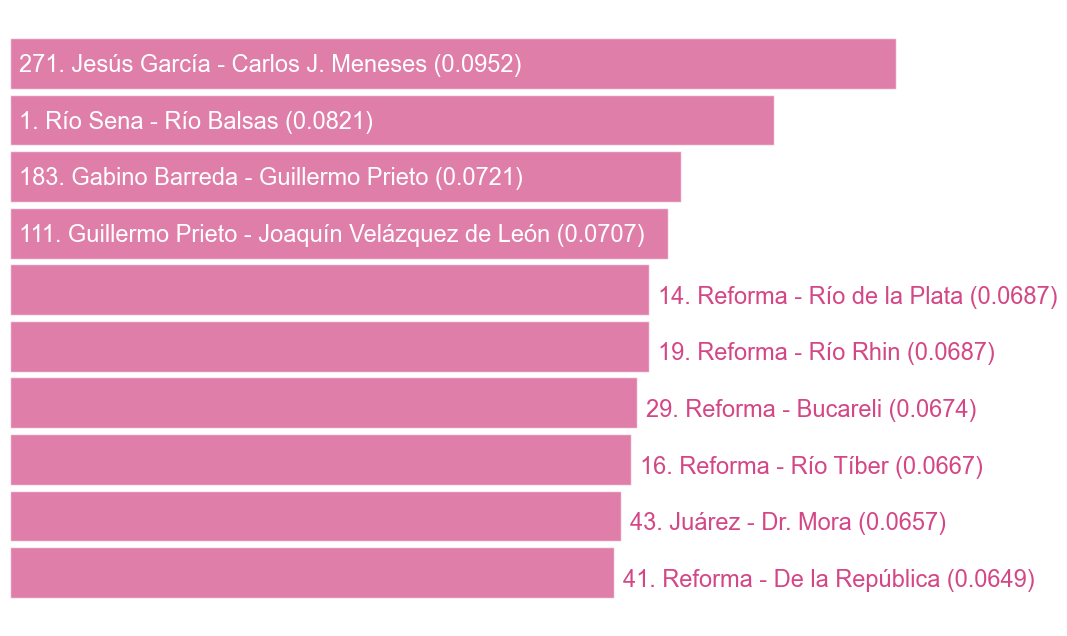

In [3]:
# Asignamos el color, el número de estaciones por barplot, el año y la medida de centralidad

color_i = 1
n = 10 
year = 2022
medida = 'close_cent'

# Filtramos los datos 

cent = datos[(datos['mesure']==medida)]
cent = cent[(cent['Year']==year)&(cent['Rank']<n)]
cent.sort_values('value',inplace=True)

y = cent.nombre.tolist()
value = cent.value.tolist()
value = [float(x) for x in value]
nombre = cent.nombre.tolist()

# Graficamos 

custom_params = {"axes.spines.right": False, "axes.spines.top": False,"axes.spines.bottom": False,
                 "axes.spines.left": False}
sns.set_theme(style="ticks", rc=custom_params);

fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(y,value, height=0.9, align="edge", color = colors[color_i],alpha= 0.7) 


lim= np.quantile(value,0.6)


for i in range(n):
    if value[i] <= lim:
        plt.text(float(value[i]) + 0.001, i + 0.2 ,nombre[i],horizontalalignment='left',color=colors[color_i],size=17,zorder=10)
    else:
        plt.text(0.001, i + 0.3 ,nombre[i],horizontalalignment='left',color="white",size=17,zorder=10)

ax.set(xlabel='', ylabel='')
ax.tick_params(top=False,bottom=False)
ax.tick_params(left=False)
ax.tick_params(labelsize=12)
ax.set_yticks([])
ax.set_xticks([])


**Nota: Para gráficar las demás medidas de centralidad por año solo hay que modificar las variables iniciales**